# Image Processing with Python

## 1. Introducing Image Processing and scikit-image


In [5]:
pip install scikit-image

In [6]:
from skimage import data

coffee_image = data.coffee()
coins_image = data.coins()

print(coffee_image.shape, coins_image.shape)

(400, 600, 3) (303, 384)


Answer: coins_image has a shape of (303, 384), grayscale. And coffee_image (400, 600, 3), RGB-3.

In [7]:
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

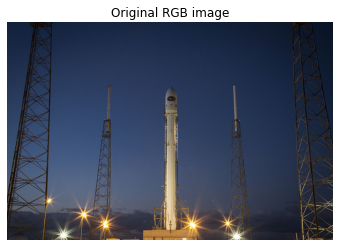

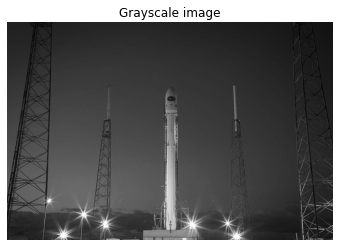

In [8]:
# Import the modules from skimage
from skimage import data, color

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

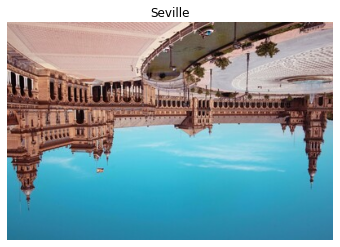

In [16]:
import numpy as np

flipped_seville = plt.imread('sevilleup(2).jpg')
show_image(flipped_seville, 'Seville')

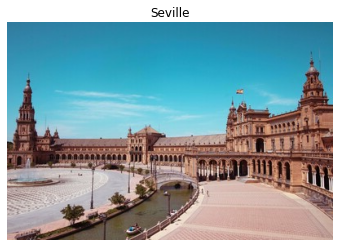

In [15]:
# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

# Flip the previous image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

# Flip the previous image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

# Show the resulting image
show_image(seville_horizontal_flip, 'Seville')

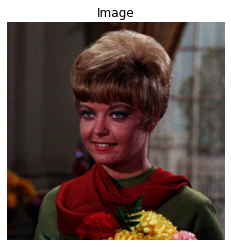

In [21]:
image = plt.imread('4.1.01.tiff')
show_image(image)

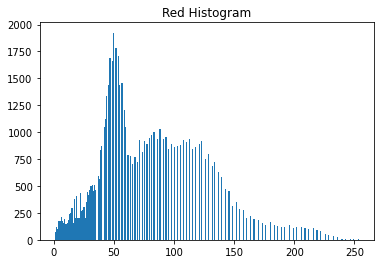

In [22]:
# Obtain the red channel
red_channel = image[:, :, 0]

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256)

# Set title and show
plt.title('Red Histogram')
plt.show()

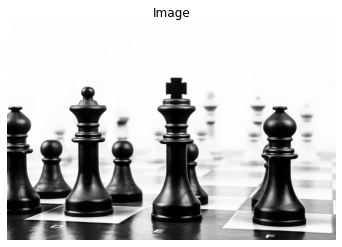

In [23]:
chess_pieces_image = plt.imread('bw.jpg')
show_image(chess_pieces_image)

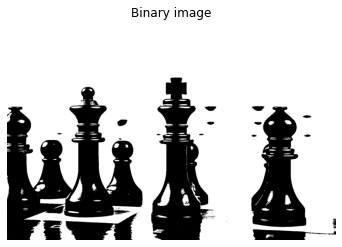

In [25]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

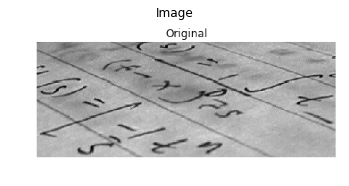

In [46]:
page_image = plt.imread('text_page_original.jpg')
show_image(page_image)

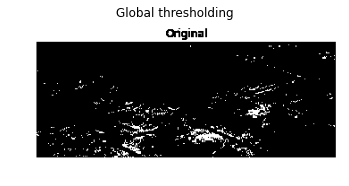

In [48]:
page_image = page_image[:,:,[1,2,3]]
page_image = rgb2gray(page_image)

# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

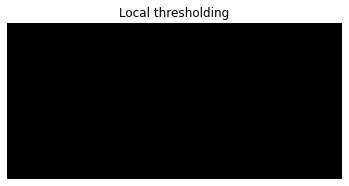

In [49]:
# Import the local threshold function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

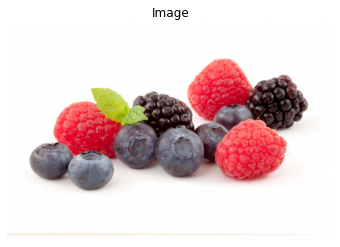

In [50]:
fruits_image = plt.imread('fruits-2.jpg')
show_image(fruits_image)

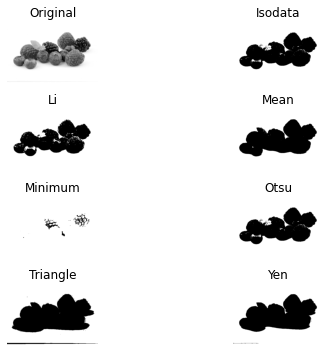

In [51]:
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

# Turn the fruits_image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

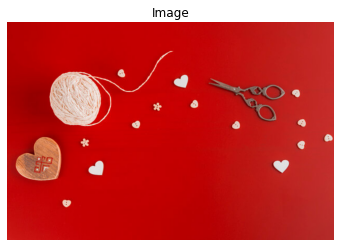

In [52]:
tools_image = plt.imread('shapes52.jpg')
show_image(tools_image)

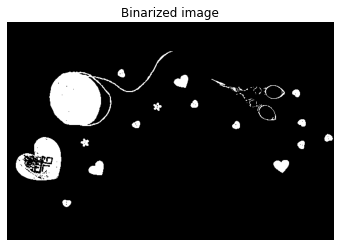

In [53]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Turn the image grayscale
gray_tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

## 2. Filters, Contrast, Transformation and Morphology


In [56]:
soaps_image = plt.imread('soap_image.jpg')

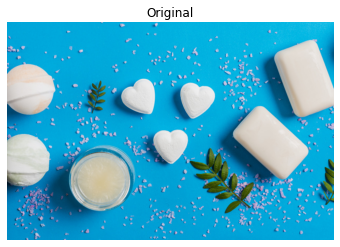

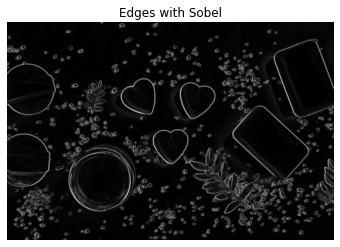

In [57]:
# Import the color module
from skimage import color

# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel, "Edges with Sobel")

In [58]:
building_image = plt.imread('building_image.jpg')

C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_3644\2805761128.py:5: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  gaussian_image = gaussian(building_image) # multichannel=True


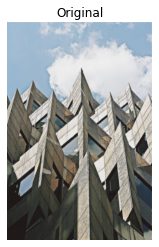

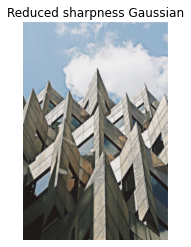

In [65]:
# Import Gaussian filter 
from skimage.filters import gaussian

# Apply filter
gaussian_image = gaussian(building_image) # multichannel=True

# Show original and resulting image to compare
show_image(building_image, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian")

Answer: The contrast is 148

In [69]:
chest_xray_image = plt.imread('chest_xray_image.png')

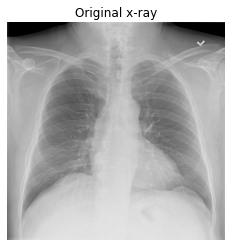

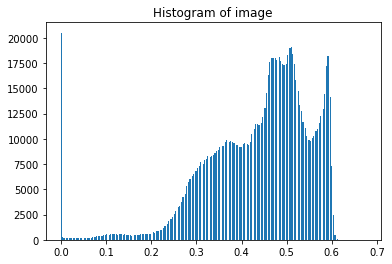

In [70]:
# Import the required module
from skimage import exposure

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

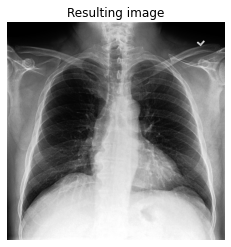

In [71]:
# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

In [72]:
image_aerial = plt.imread('image_aerial.tiff')

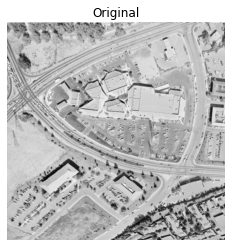

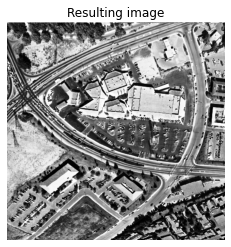

In [73]:
# Import the required module
from skimage import exposure

# Use histogram equalization to improve the contrast
image_eq =  exposure.equalize_hist(image_aerial)

# Show the original and resulting image
show_image(image_aerial, 'Original')
show_image(image_eq, 'Resulting image')

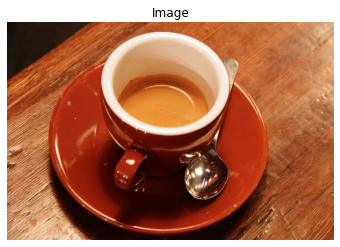

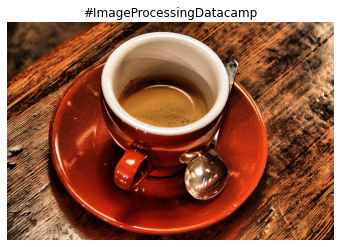

In [74]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
show_image(original_image)
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')

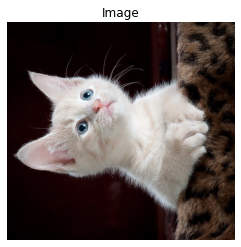

In [76]:
image_cat = plt.imread('image_cat.jpg')
show_image(image_cat)

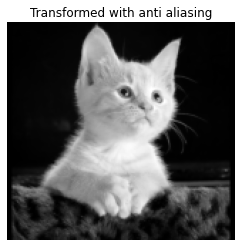

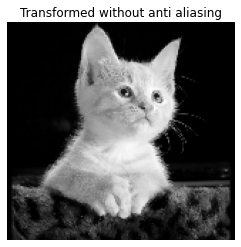

In [78]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True) # multichannel=True

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False) # multichannel=True

# Show the resulting images
show_image(rescaled_with_aa, "Transformed with anti aliasing")
show_image(rescaled_without_aa, "Transformed without anti aliasing")

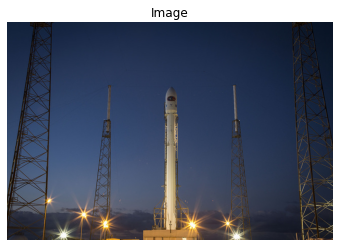

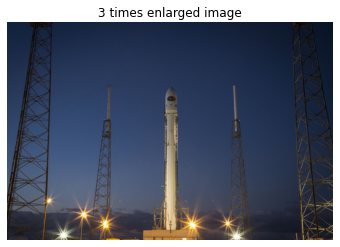

In [102]:
# Import the module and function to enlarge images
from skimage.transform import rescale

# Import the data module
from skimage import data

# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket_image, (3,3,1), anti_aliasing=True) # multichannel=True

# Show original and resulting image
show_image(rocket_image)
show_image(enlarged_rocket_image, "3 times enlarged image")

In [103]:
dogs_banner = plt.imread('dogs_banner.jpg')

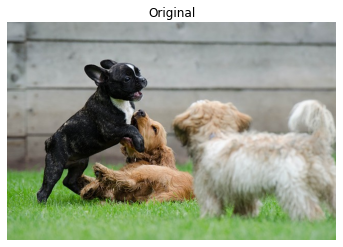

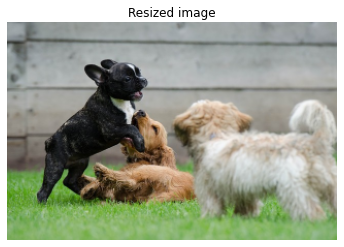

In [104]:
# Import the module and function
from skimage.transform import resize

# Set proportional height so its half its size
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width),
                       anti_aliasing=True)

# Show the original and resized image
show_image(dogs_banner, 'Original')
show_image(image_resized, 'Resized image')

In [113]:
upper_r_image = plt.imread('r5.png')

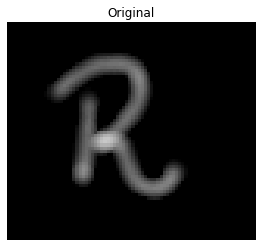

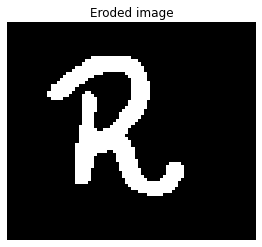

In [128]:
# Import the morphology module
from skimage import morphology

# Obtain the eroded shape 
eroded_image_shape = morphology.binary_erosion(upper_r_image) 
eroded_image_shape = eroded_image_shape.astype(float)

# See results
show_image(upper_r_image, 'Original')
show_image(eroded_image_shape, 'Eroded image')

In [121]:
world_image = plt.imread('world_image_binary.jpg')

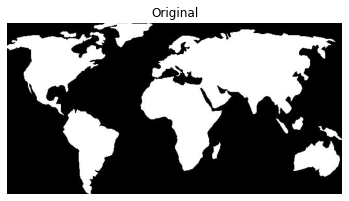

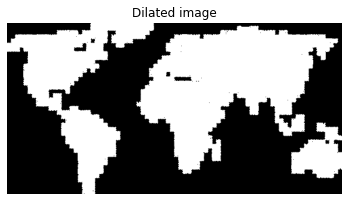

In [122]:
# Import the module
from skimage import morphology

# Obtain the dilated image 
dilated_image = morphology.binary_dilation(world_image)

# See results
show_image(world_image, 'Original')
show_image(dilated_image, 'Dilated image')

## 3. Image restoration, Noise, Segmentation and Contours


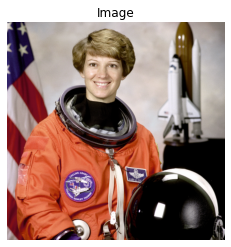

In [131]:
defect_image = plt.imread('damaged_astronaut.jpg')
original_image = data.astronaut()
show_image(original_image)

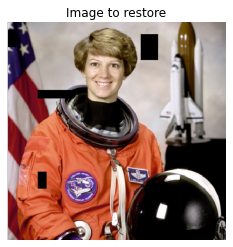

In [132]:
# Import the module from restoration
from skimage.restoration import inpaint

# Show the defective image
show_image(defect_image, 'Image to restore')

In [ ]:
# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)
show_image(restored_image)

In [149]:
image_with_logo = plt.imread('4.2.06_w_logo_2_2.png')

In [ ]:
# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo, mask) # multichannel=True

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')

In [144]:
fruit_image = plt.imread('fruits_square.jpg')

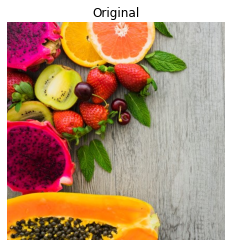

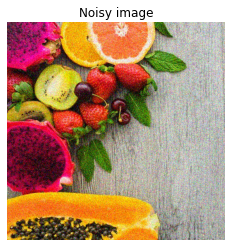

In [145]:
# Import the module and function
from skimage.util import random_noise

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
show_image(fruit_image, 'Original')
show_image(noisy_image, 'Noisy image')

In [151]:
noisy_image = plt.imread('miny.jpeg')

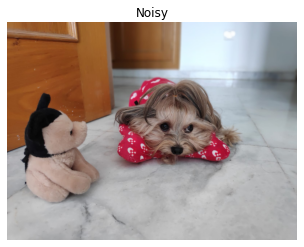

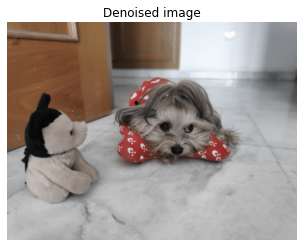

In [153]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image) # multichannel=True

# Show the noisy and denoised images
show_image(noisy_image, 'Noisy')
show_image(denoised_image, 'Denoised image')

In [154]:
landscape_image = plt.imread('noise-noisy-nature.jpg')

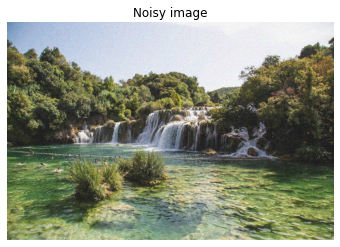

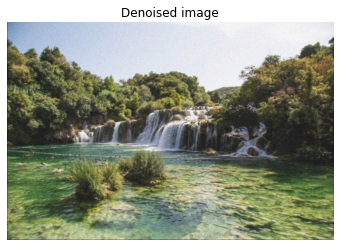

In [158]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image, channel_axis=-1) # multichannel=True

# Show original and resulting images
show_image(landscape_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')

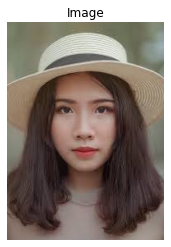

(265, 191, 3)


In [160]:
face_image = plt.imread('chinese.jpg')
show_image(face_image)
print(face_image.shape)

Answer: face_image is 265 * 191 = 50,615 pixels

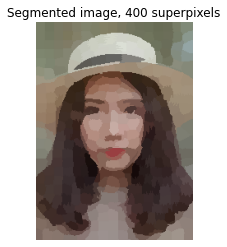

In [161]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments= 400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
show_image(segmented_image, "Segmented image, 400 superpixels")

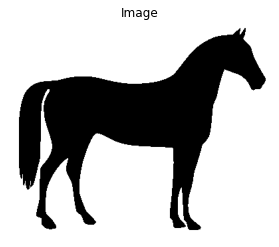

In [163]:
# Import the modules
from skimage import measure, data

# Obtain the horse image
horse_image = data.horse()

show_image(horse_image)

In [ ]:
# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, level=0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)

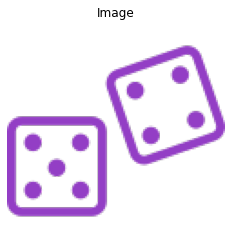

In [165]:
image_dice = plt.imread('dices.png')
show_image(image_dice)

In [ ]:
# Make the image grayscale
image_dice = color.rgb2gray(image_dice)

# Obtain the optimal thresh value
thresh = filters.threshold_otsu(image_dice)

# Apply thresholding
binary = image_dice > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, level=0.8)

# Show the image
show_image_contour(image_dice, contours)

In [ ]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

## 4. Advanced Operations, Detecting Faces and Features


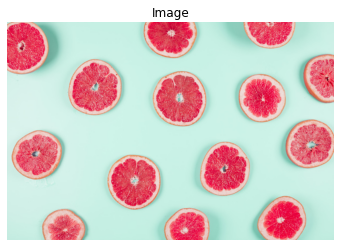

In [166]:
grapefruit = plt.imread('toronjas.jpg')
show_image(grapefruit)

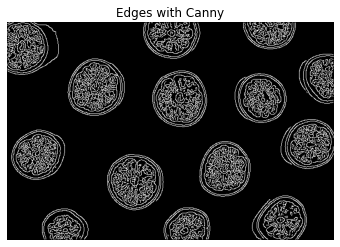

In [167]:
# Import the canny edge detector 
from skimage.feature import canny

# Convert image to grayscale
grapefruit = color.rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image
show_image(canny_edges, "Edges with Canny")

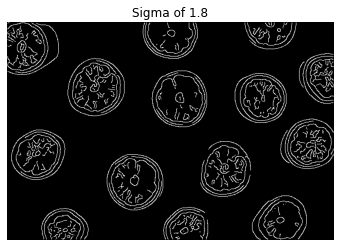

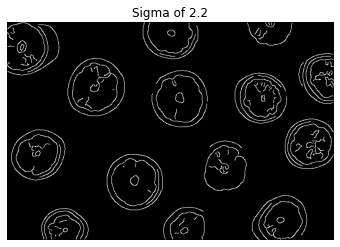

In [168]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")

In [169]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()

In [170]:
building_image = plt.imread('corners_building_top.jpg')

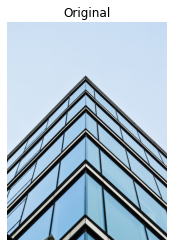

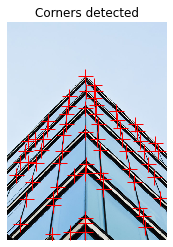

In [171]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

# Convert image from RGB-3 to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=20, threshold_rel=0.02)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

With a min_distance set to 10, we detect a total 89 corners in the image.
With a min_distance set to 60, we detect a total 20 corners in the image.


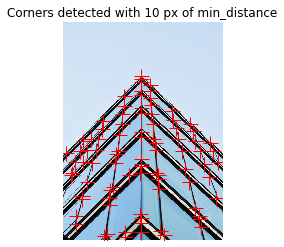

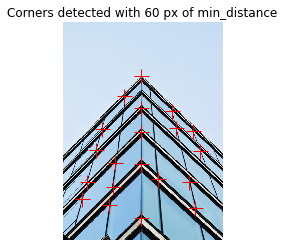

In [172]:
# Find the peaks with a min distance of 10 pixels
coords_w_min_10 = corner_peaks(measure_image, min_distance=10, threshold_rel=0.02)
print("With a min_distance set to 10, we detect a total", len(coords_w_min_10), "corners in the image.")

# Find the peaks with a min distance of 60 pixels
coords_w_min_60 = corner_peaks(measure_image, min_distance=60, threshold_rel=0.02)
print("With a min_distance set to 60, we detect a total", len(coords_w_min_60), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_10, "Corners detected with 10 px of min_distance")
show_image_with_corners(building_image, coords_w_min_60, "Corners detected with 60 px of min_distance")

In [178]:
from matplotlib import patches

def show_detected_face(result, detected, title="Face image"):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2
            )
        )
        
    plt.show()

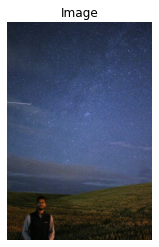

In [179]:
night_image = plt.imread('face_det3.jpg')
show_image(night_image)

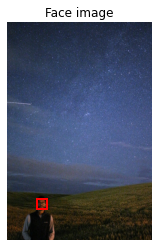

In [180]:
from skimage.feature import Cascade

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))

# Show the detected faces
show_detected_face(night_image, detected)

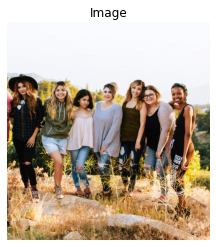

In [181]:
friends_image = plt.imread('face_det_friends22.jpg')
show_image(friends_image)

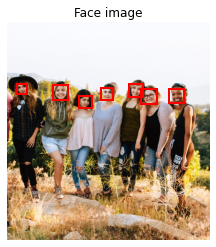

In [182]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

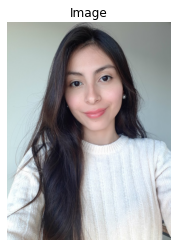

In [183]:
profile_image = plt.imread('face_det9.jpg')
show_image(profile_image)

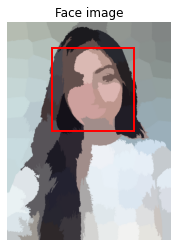

In [184]:
# Obtain the segmentation with default 100 regions
segments = slic(profile_image, 100)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

In [213]:
def getFaceRectangle(d):
    '''Extracts the face rectangle from the image using
    coordinates of the detected.'''
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'], d['c'] + d['height']
    
    # Extract the detected face
    face = image[x:width, y:height]
    return face

In [214]:
def mergeBlurryFace(original, gaussian_image):
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
        
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'], d['c'] + d['height']
    
    # Extract the detected face
    original[x:width, y:height] = gaussian_image
    return original

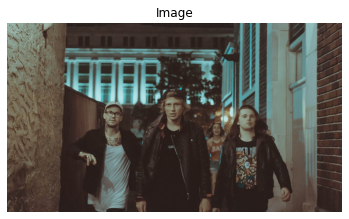

In [215]:
group_image = plt.imread('face_det25.jpg')
show_image(group_image)

In [ ]:
# Detect the faces
detected = detector.detect_multi_scale(img=group_image, 
                                       scale_factor=1.2, step_ratio=1, 
                                       min_size=(10, 10), max_size=(100, 100))
# For each detected face
for d in detected:  
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(d)
    
    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, sigma = 8) # multichannel=True
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face)
    
show_image(resulting_image, "Blurred faces")

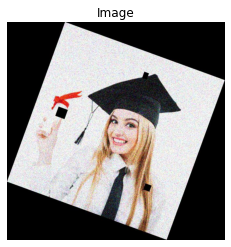

In [224]:
damaged_image = plt.imread('sally_damaged_image.jpg')
show_image(damaged_image)

In [ ]:
# Import the necessary modules
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage import transform

# Transform the image so it's not rotated
upright_img = transform.rotate(damaged_image, 20)

# Remove noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(upright_img,weight=0.1) # multichannel=True

# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask) # multichannel=True

show_image(result)